# Studying minimum allowable distance between spiral tips
Tim Tyree<br>
4.18.2021

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from numba import njit
#load the libraries
from lib import *

from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.model.LR_model import *
from lib.utils.utils_traj import *
from lib.routines.bdrates import *
from lib.measure.utils_measure_tips_cpu import *
from lib.utils.stack_txt_LR import *
from lib.viewer import *
import trackpy
from lib.utils import load_buffer

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# initialize a token case repeatably for Luo-Rudy model (~15 min runtime)

In [31]:
# ic_fn=search_for_file()
ic_fn=f"{nb_dir}/Data/initial-conditions-suite-3-LR/ic-out/ic008.33.npz"
txt=load_buffer(ic_fn)
t=0

In [32]:
# get_one_step
dt, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,
    dt=0.01,
    width=200,
    height=200,
    ds=5.0,
    diffCoef=0.001,
    Cm=1.0)

In [33]:
inVc, outVc, inmhjdfx, outmhjdfx, dVcdt=unstack_txt(txt.copy())

In [34]:
tf=100.
while t<tf:
    one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
    t+=dt

In [35]:
#test timestep updates all channels
inVc0, outVc0, inmhjdfx0, outmhjdfx0, dVcdt0=unstack_txt(txt)
assert (np.max(np.abs(inVc0-inVc))>0)
assert (np.max(np.abs(outVc0-outVc))>0)
assert (np.max(np.abs(inmhjdfx0-inmhjdfx))>0)
assert (np.max(np.abs(outmhjdfx0-outmhjdfx))>0)
assert (np.max(np.abs(dVcdt0-dVcdt))>0)

In [36]:
width=200;height=200
compute_all_spiral_tips=get_compute_all_spiral_tips(width, height, mode='simp')

In [37]:
#compute all spiral tips present
V_threshold=-50.#mV
level1=V_threshold
# theta_threshold=0.
level2=0.
#take the first step
one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
t+=dt
img=inVc[...,0]
dimgdt=dVcdt[...,0]
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)
dict_out_instantaneous=dict_out
print(np.max(inVc[...,0]))
dict_out_instantaneous

6.685565


{'t': 100.01000000001426,
 'n': 2,
 'x': [31.138362916846777, 92.77389184880282],
 'y': [94.4573011205346, 46.08495673401471],
 'grad_ux': [48.25899117063655, -1.151004739451925],
 'grad_uy': [-14.571703140113451, 5.319836154079837],
 'grad_vx': [-1.128798415084153, 10.04577590081355],
 'grad_vy': [1.6993321317647967, -17.202332047623162]}

2 tips are present at time t=100.


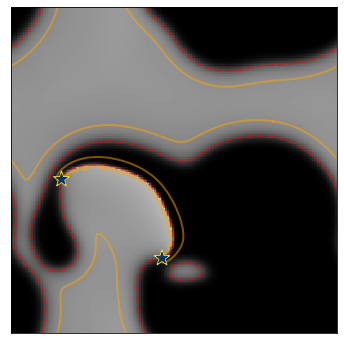

In [38]:
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
plt.show(fig)

In [39]:
txt=stack_txt(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=os.path.basename(ic_fn).replace('.npz',f'_t_{t:.0f}.npz')
    save_img_folder=f"{nb_dir}/Data/test_data/"
    os.chdir(save_img_folder)
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,[txt])

In [26]:
# os.path.abspath(save_img_fn)
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_100.npz'
txt=load_buffer(txt_fn)
t=100
#TODO: save txt as txt_save regularly at time t_save
#TODO: time step until a spiral tip death occurs

In [27]:
#DONE: detect all spiral tips present
#TODO: compute r=minimum distance between all spiral tips 
#TODO: record r given current time step
#TODO: repeat ^that death event using half the time step.  Is r different? ...If not, be sure before continuing.

# get_one_step
dt, arr39, one_step = get_one_step_explicit_synchronous_splitting(
    nb_dir,
    dt=0.01,
    width=200,
    height=200,
    ds=5.0,
    diffCoef=0.001,
    Cm=1.0)

width=200;height=200
compute_all_spiral_tips=get_compute_all_spiral_tips(width, height, mode='simp')

In [4]:
# filename=search_for_file()
filename="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/trajectories/ic008.33_traj_sr_600_mem_0.csv"

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_50_diffCoef_0.001/trajectories/ic008.33_traj_sr_600_mem_0.csv


In [5]:
#determine the first time of death
df=pd.read_csv(filename)
df.head()

,t,n,x,y,grad_ux,grad_uy,grad_vx,grad_vy,frame,particle
0,100.1,4,76.107144,95.769295,2.122038,0.110608,3.848873,-1.268491,0,0
1,100.1,4,138.428533,177.960260,1.425500,0.669138,0.559806,1.344284,0,1
2,100.1,4,145.710107,103.460688,1.490384,0.305823,0.463274,1.750858,0,2
3,100.1,4,172.360040,199.042657,1.714722,0.384820,7.247116,-4.410005,0,3
4,102.1,4,76.078799,97.642564,2.174351,0.088509,4.100056,-1.418567,1,0


In [6]:
dff=df.groupby('frame').n.mean()

In [12]:
death_frame_values=dff[dff.diff()==-2].index.values


In [18]:
t_lst=[]
for frm in death_frame_values:
    t_lst.append(df[df.frame==frm].t.mean())

In [40]:
inVc, outVc, inmhjdfx, outmhjdfx, dVcdt=unstack_txt(txt.copy())

In [41]:
txt_lst=[]
for tf in t_lst[:8]:
    while t<tf-1:
        one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
        t+=dt
    txt=stack_txt(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
    txt_lst.append(txt)

In [42]:
beep(4)

0

In [43]:
len(txt_lst)

8

# identify an LR death event for zooming into

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10


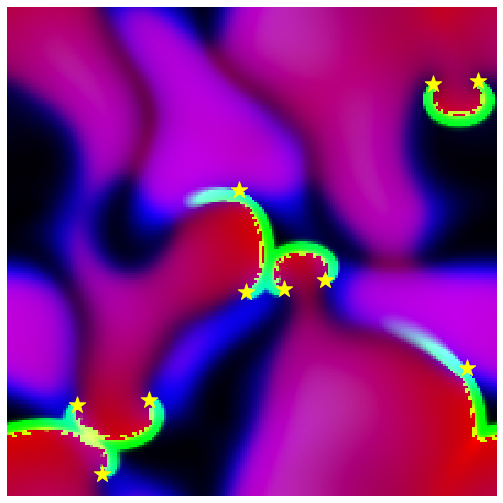

In [60]:
#test the V_threshold value
j=1
q=7
V_threshold=-50.
level1 = V_threshold
t=-999
level2 = 0.
# ic=input_fn_lst[j]
# txt=load_buffer(ic)#input_fn)
txt=txt_lst[q]
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
t=t_lst[q]
width,height=txt.shape[:2]

img=inVc[...,0]
dimgdt=dVcdt[...,0]
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
print(len(list(dict_out['x'])))
fig=show_buffer_LR(txt)
axs=fig.get_axes()
ax=axs[0]
ax.scatter(dict_out['x'],dict_out['y'],s=300,c='yellow',marker='*')
plt.show()

In [62]:
# txt=stack_txt(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=os.path.basename(ic_fn).replace('.npz',f'_t_{t:.1f}.npz')
    save_img_folder=f"{nb_dir}/Data/test_data/"
    os.chdir(save_img_folder)
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,txt)

# advance in time until two tips annihilate.  identify the location of annihilation.

In [88]:
txt_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/ic008.33_t_444.1.npz'
txt=load_buffer(txt_fn).astype('float64')
t=444.1

In [89]:
def get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.):
    # inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
    #     width,height=txt.shape[:2]
    img=inVc[...,0]
    dimgdt=dVcdt[...,0]
    dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
    return np.array(dict_out['x']),np.array(dict_out['y'])

In [174]:
x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
n_tips=x_values.shape[0]
n_tips_current=n_tips
n_tips_current

6

In [175]:
while n_tips>=n_tips_current:
    txt_prev=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    x_values_prev=x_values.copy()
    y_values_prev=y_values.copy()
    one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
    t+=dt
    x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
    n_tips=x_values.shape[0]
print(t)
print(n_tips)
txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

697.9399999997692
4


6 tips are present at time t=696.99.


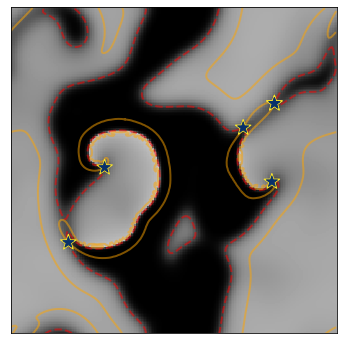

In [191]:
beep(10)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)-dt}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# fig = ShowDomain(img,dimgdt,np.array([xyavg[0]]),np.array([xyavg[1]]),np.array([0]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
# plt.show(fig)

4 tips are present at time t=697.


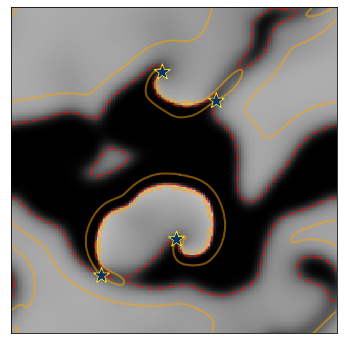

In [179]:
beep(10)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# fig = ShowDomain(img,dimgdt,np.array([xyavg[0]]),np.array([xyavg[1]]),np.array([0]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
# plt.show(fig)

In [181]:
print(sorted(zip(x_values_prev,y_values_prev)))
print(sorted(zip(x_values,y_values)))

[(55.72387513287924, 35.35097954340235), (92.97183554041425, 160.15211296795283), (101.70677120695012, 57.57169828133864), (126.0918613651391, 142.53495599204214), (140.96357241847184, 161.7024554609346), (141.0044240236116, 161.70930304941754)]
[(35.35097954340239, 55.723875132878995), (57.571698281338065, 101.7067712069501), (142.5349559920376, 126.09186136513908), (160.15211296790588, 92.97183554040545), (161.70245546093162, 140.96357241844856), (161.7093030494175, 141.0044240236156)]


In [196]:
dist=get_distance_L2_pbc(width=width, height=height)

In [182]:
print(x_values_prev)
print(x_values)

[ 55.72387513  92.97183554 101.70677121 126.09186137 140.96357242
 141.00442402]
[ 35.35097954  57.57169828 142.53495599 160.15211297 161.70245546
 161.70930305]


In [201]:
imin=np.argmin(np.diff(x_values_prev))
xy1=np.array(sorted(zip(x_values_prev,y_values_prev))[imin])
xy2=np.array(sorted(zip(x_values_prev,y_values_prev))[imin+1])
#compute distance between these two spiral tips before death
r=dist(xy1,xy2)
#compute average location of these two spiral tips before death
xyavg=(xy1+xy2)/2.


In [188]:
# #view the death location and verify that it looks reasonable
# # print(len(list(dict_out['x'])))
# txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
# fig=show_buffer_LR(txt)
# axs=fig.get_axes()
# ax=axs[0]
# ax.scatter(dict_out['x'],dict_out['y'],s=300,c='yellow',marker='*')
# ax.scatter([xyavg[0]],[xyavg[1]],s=500,c='blue',marker='*')
# plt.show()

In [189]:
#Save the validated death event
# txt=stack_txt(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)

#save texture at this time t
save=True
if save:
#     txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    save_img_fn=os.path.basename(ic_fn).replace('.npz',f'_t_{t:.1f}.npz')
    save_img_folder=f"{nb_dir}/Data/test_data/"
    os.chdir(save_img_folder)
    #     img_out=txt#np.stack([img,dimgdt]).T
    np.savez_compressed(save_img_fn,txt_prev)
print(os.path.abspath(save_img_fn))

/home/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/ic008.33_t_697.9.npz


# measure minimum distance versus dt with high spatial resolution

In [2]:
# def get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.):
#     # inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
#     #     width,height=txt.shape[:2]
#     img=inVc[...,0]
#     dimgdt=dVcdt[...,0]
#     dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
#     return np.array(dict_out['x']),np.array(dict_out['y'])

# def zoomin_txt(txt_in):
#     width,height,chnlno=txt_in.shape[:3]
#     out=np.zeros((2*width,2*height,chnlno))
#     #linearly interpolate
#     out[::2,::2,:]=txt_in.copy()
#     out[1:-2:2]=(out[0:-2:2]+out[2:-1:2])/2
#     out[:,1:-2:2]=(out[:,0:-2:2]+out[:,2:-1:2])/2
#     #final row/column for pbc
#     out[-1,:]=(out[-2,:]+out[0,:])/2
#     out[:,-1]=(out[:,-2]+out[:,0])/2
#     return out

In [3]:
# txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_697.9.npz'
# txt_prev=load_buffer(txt_fn)
# t=697.92

In [5]:
# txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_750.0.npz'
# t=750.
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_900.0.npz'
t=900.

txt_prev=load_buffer(txt_fn)
width,height=txt_prev.shape[:2]
width,height

(200, 200)

6 tips are present at time t=900.


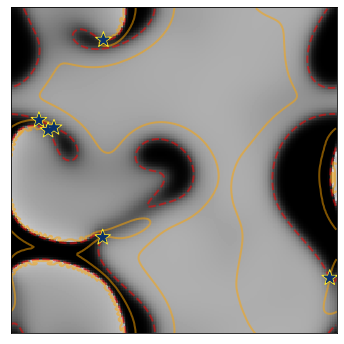

In [6]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
V_threshold=-50
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# fig = ShowDomain(img,dimgdt,np.array([xyavg[0]]),np.array([xyavg[1]]),np.array([0]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
# plt.show(fig)

In [9]:
#Time step until there are no more tips... saving every 50 and keeping the most recent 
t_save=t+50
t_prev=t
# txt_prev=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
n_tips=x_values.shape[0]
while n_tips>0:
    one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
    t+=dt
    if t>t_save:
        t_save+=30.
        t_prev=t
        txt_prev=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
        n_tips=x_values.shape[0]
print(f"termination event observed before time t={t:.3f}.")
beep(10)

NameError: name 'one_step' is not defined

8 tips are present at time t=750.


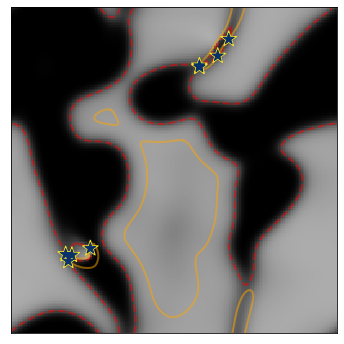

In [14]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
V_threshold=-50
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# fig = ShowDomain(img,dimgdt,np.array([xyavg[0]]),np.array([xyavg[1]]),np.array([0]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
# plt.show(fig)

In [7]:
# x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
# n_tips=x_values.shape[0]
# n_tips_current=n_tips
# n_tips_current

In [8]:
# 0.025*r*10**3 #min distance in millimeters

In [9]:
dt_lst=[0.01,0.001]#,0.0001]
r_lst=[]
ds=5.
for dt in dt_lst:
    # load txt_prev and init t
    txt_prev=load_buffer(txt_fn)
    for ___ in range(5):
        txt_prev=zoomin_txt(txt_prev)
    t=697.92
    inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev.copy())
    width,height=txt_prev.shape[:2]
    compute_all_spiral_tips=get_compute_all_spiral_tips(width, height, mode='simp')
    dist=get_distance_L2_pbc(width=width, height=height)
    x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
    n_tips=x_values.shape[0]
    n_tips_current=n_tips

    # get_one_step at this dt
    __, arr39, one_step = get_one_step_explicit_synchronous_splitting(
        nb_dir,
        dt=dt,
        width=width,
        height=height,
        ds=ds,
        diffCoef=0.001,
        Cm=1.0)
    dsdpixel=ds/width
    # forward integrate until n_tips decreases
    while n_tips>=n_tips_current:
        txt_prev=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
        x_values_prev=x_values.copy()
        y_values_prev=y_values.copy()
        one_step(inVc, outVc, inmhjdfx, outmhjdfx, dVcdt)
        t+=dt
        x_values,y_values=get_tip_locations(inVc,dVcdt,level1=-50.,level2=0.)
        n_tips=x_values.shape[0]
    print(f"time of death was {t:.6f} ms when dt={dt} milliseconds.")

    # record most recent closest distance
    imin=np.argmin(np.diff(x_values_prev))
    xy1=np.array(sorted(zip(x_values_prev,y_values_prev))[imin])
    xy2=np.array(sorted(zip(x_values_prev,y_values_prev))[imin+1])
    #compute distance between these two spiral tips before death
    r=dist(xy1,xy2)
    r_lst.append(r*dsdpixel*10**3) # mm
for r,dt in zip(r_lst,dt_lst):
    print(f"The minimum distance was {r} millimeters when dt={dt} milliseconds.")
print(f"\nthe space between two pixels was {dsdpixel*10**3} millimeters.")

time of death was 697.930000 ms when dt=0.01 milliseconds.
time of death was 697.922000 ms when dt=0.001 milliseconds.


KeyboardInterrupt: 

In [ ]:
beep(20)

In [ ]:
#is it necessary to shrink down the spatial resolution, ds/width? ...yes
#does min range decrease when dsdpixel is halved? ...yes

__Results__
- at original spatial resolution, this min distance was ~1.03 mm for dt=0.0001.
- at 4X finer spatial resolution, this min distance was ~58 $\mu$m for dt=0.0001.
- at 32X finer spatial resolution, this min distance was ~?? $\mu$m for dt=0.0001.

# measure the activation front distance between sister spiral tips

__MVP__
- TODO: identify the contour in the direction of spiral tip motion
- TODO: compute the activation front distance, $\sigma_\max>0$, for one snapshot
- TODO: track ^this distance while zooming into the termination event
- TODO: Are there any effective forces between spiral tips just before death?  Let $F \propto \ddot \sigma_\max$

_Bonus_
- TODO: compute the activation front curvature for one snapshot
- TODO: plot each state variable versus distance from the spiral tip.  Does this graph vary over time?  Does this graph change at close ranges? Does this graph change with activation front curvature?


6 tips are present at time t=900.


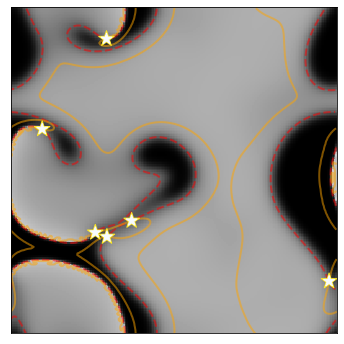

In [3]:
#load a mesh from Luo-Rudy that is near termination
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_900.0.npz'
t=900.

txt_prev=load_buffer(txt_fn)
width,height=txt_prev.shape[:2]
width,height

inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
V_threshold=-40
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
dict_out=compute_all_spiral_tips(t,img,dimgdt,level1=V_threshold,level2=0.)#,width=width,height=height)
x_values=np.array(dict_out['x'])
y_values=np.array(dict_out['y'])
c_values=np.array(dict_out['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,0.*c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# j=0
# fig = ShowDomain(img,dimgdt,np.array([x_values[j]]),
#                  np.array([y_values[j]]),
#                  np.array([0.*c_values[j]]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
plt.show(fig)

In [4]:
#compute local spiral tip information
compute_all_spiral_tips= get_compute_all_spiral_tips(mode='full',width=width,height=height)
dict_local=compute_all_spiral_tips(t, img, dimgdt, V_threshold, 0.)
dict_local.keys()

dict_keys(['t', 'n', 'x', 'y', 'theta', 'grad_ux', 'grad_uy', 'grad_vx', 'grad_vy', 'v', 'dvdt'])

In [5]:
#compute spiral tip location and topological number
contours_a = find_contours(img,        level = V_threshold)
contours_b = find_contours(dimgdt,     level = 0.)
s1_lst, s2_lst, x_lst, y_lst = contours_to_simple_tips_pbc(contours_a,contours_b,width, height,jump_threshold = 2,size_threshold = 6)
dict_topo={'x':x_lst,'y':y_lst,'s1':s1_lst,'s2':s2_lst}
dict_topo.keys()

dict_keys(['x', 'y', 's1', 's2'])

6 tips are present at time t=900.


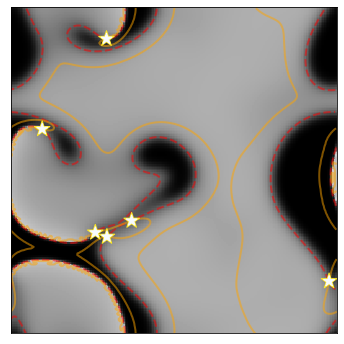

In [6]:
#verify the topologically located tips are still reasonable
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt_prev)
img=inVc[...,0]
dimgdt=dVcdt[...,0]
x_values=np.array(dict_topo['x'])
y_values=np.array(dict_topo['y'])
c_values=np.array(dict_topo['x'])
print(f"{dict_out['n']} tips are present at time t={int(t)}.")
fig = ShowDomain(img,dimgdt,x_values,y_values,0.*c_values,V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
                 area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# j=0
# fig = ShowDomain(img,dimgdt,np.array([x_values[j]]),
#                  np.array([y_values[j]]),
#                  np.array([0.*c_values[j]]),V_threshold,t,inch=6,fontsize=16,vmin_img=-85.,vmax_img=35.,
#                  area=25,frameno=1,save_fn=None,save_folder=None,save=False,annotating=False,axis=[0,200,0,200])
# ax=fig.get_axes()[0]
# ax.scatter([xyavg[0]],[xyavg[1]],s=1000,c='yellow',marker='*')
plt.show(fig)

In [7]:
#jit compile module to llvm machine code
locate_nearest_point_index = get_locate_nearest_point_index(width=width,height=height)
distance_L2_pbc=get_distance_L2_pbc(width=width,height=height)
project_point_2D=get_project_point_2D(width=width,height=height)
subtract_pbc=get_subtract_pbc(width=width,height=height)
comp_perimeter=get_comp_perimeter(width=width,height=height)
fix_node_id=get_fix_node_id(width=width,height=height)
retval=get_arclength_module(width=width,height=height)
locate_node_indices, compute_arclength_values, compute_arclength, compute_arclength_values_upto_next, compute_arclength_values_for_tips=retval

In [8]:
#extract values for arclength measurement
contours1=[np.vstack([c[:,1],c[:,0]]).T for c in contours_a]
contours2=[np.vstack([c[:,1],c[:,0]]).T for c in contours_b]
x_values=np.array(dict_topo['x'])
y_values=np.array(dict_topo['y'])
xy_values=np.array(list(zip(dict_topo['x'],dict_topo['y'])))
s1_values=np.array(dict_topo['s1'])
s2_values=np.array(dict_topo['s2'])
#TODO(later):njit what's after ^this
s2_values

array([0, 0, 0, 0, 0, 0])

In [9]:
#precompute the locations spiral tips on the contours
node_id1_lst, node_id2_lst=locate_node_indices(xy_values,s1_values,s2_values,contours1,contours2)
(node_id1_lst,node_id2_lst)

([129, 303, 605, 761, 1006, 1031], [910, 612, 418, 196, 165, 114])

In [10]:
#i suspect that getting the next node isn't working right when the node_id_lst is not sorted
#if so, quick fix = look for where node_id_lst is accessed and make sure it has that sorted_id_lst as a buffer

In [11]:
# compute arclengths for the first contour family....
node_id_lst=node_id1_lst
s_values=s1_values
contours=contours1
node_id_lst=node_id1_lst
j_lst,s_lst,archlen_values_lst=compute_arclength_values_for_tips(xy_values,node_id_lst,s_values,contours)
j1_lst,s1_lst=j_lst,s_lst;archlen1_values_lst=list(archlen_values_lst)

# compute arclengths for the second contour family....
node_id_lst=node_id2_lst
s_values=s2_values
contours=contours2
node_id_lst=node_id2_lst
j_lst,s_lst,archlen_values_lst=compute_arclength_values_for_tips(xy_values,node_id_lst,s_values,contours)
j2_lst,s2_lst=j_lst,s_lst;archlen2_values_lst=list(archlen_values_lst)

In [14]:
#DONE(testing): get this to work for both contour families
#TODO(testing): get this to work for both when V_threshold=-50 #mV
import collections
from collections import deque


collections.deque

In [21]:
# collections.ChainMap?


In [58]:
#DONE: compute all starting/stopping nodes
#for a given spiral tip...
#TODO: compute first fractional distance
#TODO: track cumulative sum of arclength up to the stopping point
#TODO: append the final fractional distance
#TODO: wrap all ^this into a function


#TODO: use ^that to make a full loop
#TODO: plot ^that at several time points... 
#TODO(later)...make a little movie of ^that?


In [28]:
#identify activation fronts
#TODO(later): make function that interpolated an NxMxC numpy array to each of the node points on a contour
#TODO(later): make function that gives voltage as a function of sigma
#TODO(later): make function that identifies activation fronts via np.mean(arcVoltage_values)>V_threshold+atol

In [11]:
#TODO(later): interpolate txt and dtxt_dt at each node point on a contour
#TODO(later): plot the voltage along the activation front (dVdt=0, V>V_thresh)

In [ ]:
#TODO(later): measure grav_ux,y or grad_vx,y at each node on the contour
#TODO(later): measure grav_ux,y and grad_vx,y at each node on the contour

In [1]:
# #TODO: visualize the activatation front connecting two sister spiral tips
# # img,dimgdt,x_values,y_values,c_values,V_threshold,t,
# save=False
# inch=6;fontsize=16;vmin_img=-85.;vmax_img=35.;area=25;frameno=1;save_fn=None;save_folder=None;save=False;annotating=False;axis=[0,200,0,200];    
# vmin_tips=0.;vmax_tips=1.;
# fig, ax = plt.subplots(figsize=(inch,inch))
# ax.imshow(img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
# # ax.imshow(dimgdt, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
# # ax.imshow(dimgdt*img, cmap=plt.cm.gray,vmin=vmin_img,vmax=vmax_img)
# plot_contours_pbc(contours_a, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='red')#'blue')
# # plot_contours_pbc(contours2, ax, linewidth=2, min_num_vertices=6, linestyle='--', alpha=0.5, color='green')
# plot_contours_pbc(contours_b, ax, linewidth=2, min_num_vertices=6, linestyle='-', alpha=0.5, color='orange')

# #plot spiral tips. color inner spiral tip by slow variable
# ax.scatter(x=xv, y=yv, s=270, c='y', marker='*', zorder=3, alpha=.5, vmin=vmin_tips,vmax=vmax_tips)

# # ax.scatter(x=x_values, y=y_values, s=270, c=1+0.*c_values, marker='*', zorder=3, alpha=.5, vmin=vmin_tips,vmax=vmax_tips)
# ax.axis(axis)
# #     ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# if not save:
#     plt.show()
# else:
#     if save_fn is None:
#         save_fn = f"img{frameno:07d}.png"
#         frameno += 1
# #         plt.tight_layout()
#     if save_folder is not None:
#         os.chdir(save_folder)
#     plt.savefig(save_fn,dpi=720/inch, bbox_inches='tight',pad_inches=0);
# #         plt.close();

# TODO: dev compute_arc_values_for_tips
- TODO: dev interpolate_txt_for_lst using bilinear interpolation
- TODO: dev compute_arc_values_upto_next
- TODO: dev compute_arc_values_for_tips